In [1]:
import pandas as pd
import os
import random
import numpy as np
from scipy.spatial import distance
import matplotlib.pyplot as plt 

from transformers import BertModel, BertTokenizer 
import torch

/Users/sachichitre/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#import data
mammals = pd.read_excel('./data/promptListMammal.xlsx')
reptiles = pd.read_excel('./data/promptListReptile.xlsx')
birds = pd.read_excel('./data/promptListBird.xlsx')
bugs = pd.read_excel('./data/promptListBugs.xlsx')
fish = pd.read_excel('./data/promptListFish.xlsx')
mamrep = pd.read_excel('./data/TMammal-FReptile.xlsx')
 
#print(fish)

In [3]:
# Picking 15 random prompts from each dataset
# reptiles_15 = reptiles.sample(n=15, random_state=0)
# mammals_15 = mammals.sample(n=15, random_state=0)
list_of_strings = mamrep[0].astype(str).tolist()

# Print the list of strings
print(list_of_strings)
# mam = mammals_15.to_string(index=False)
# mammals_sampled = mammals.sample(n=10, random_state=0)
# mammals_list = mammals_sampled.squeeze().toList()
# fish_15 = fish.sample(n=15, random_state=0)
# bugs_15 = bugs.sample(n=15, random_state=0)
# birds_15 = birds.sample(n=15, random_state=0)
print(mamrep)
type(mamrep)
# type(mammals_list)

['Is a Brown Hyena a reptile?', 'Is a Bobcat a reptile?', 'Is a Pied Tamarin a reptile?', 'Is a Akbash a reptile?', 'Is a Peruvian Inca Orchid a reptile?', 'Is a Eskipoo a reptile?', 'Is a Pugshire a reptile?', 'Is a Cheetah a reptile?', 'Is a Yoranian a reptile?', 'Is a Spanish Mastiff a reptile?', 'Is a American Eskimo Dog a reptile?', 'Is a Boxerdoodle a reptile?', 'Is a Fox Terrier a reptile?', 'Is a Zuchon a reptile?', 'Is a Dorgi a reptile?']
                                       0
0            Is a Brown Hyena a reptile?
1                 Is a Bobcat a reptile?
2           Is a Pied Tamarin a reptile?
3                 Is a Akbash a reptile?
4   Is a Peruvian Inca Orchid a reptile?
5                Is a Eskipoo a reptile?
6               Is a Pugshire a reptile?
7                Is a Cheetah a reptile?
8               Is a Yoranian a reptile?
9        Is a Spanish Mastiff a reptile?
10   Is a American Eskimo Dog a reptile?
11           Is a Boxerdoodle a reptile?
12           I

pandas.core.frame.DataFrame

In [4]:
# Load pre-trained BertModel and BertTokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased') 
model = BertModel.from_pretrained('bert-base-uncased' ) 

In [5]:
# Function to find the animal name between "a" or "an" and "mammal" using vector embeddings
def get_word_embedding(sentence, target_word):
    # Tokenize the sentence
    inputs = tokenizer(sentence, return_tensors='pt')
    
    # Get the input IDs and tokens
    input_ids = inputs['input_ids']
    tokens = tokenizer.convert_ids_to_tokens(input_ids[0])
    
    # Get the embeddings for the sentence
    with torch.no_grad():
        outputs = model(**inputs)
        last_hidden_states = outputs.last_hidden_state
    
    # Find the index of the target word
    target_index = None
    for i, token in enumerate(tokens):
        if token == target_word:
            target_index = i
            break
    
    # If the target word is found, extract its embedding
    if target_index is not None:
        # Extract the embedding for the target word
        target_embedding = last_hidden_states[0, target_index, :]
        # Convert to numpy array
        target_embedding_np = target_embedding.detach().numpy()
        return target_embedding_np
    else:
        # Return None if the target word is not found
        return None

# Example usage
sentence = "Is a brown hyena a mammal?"
target_word = "is"
embedding = get_word_embedding(sentence, target_word)
print(embedding)

# prompt2 = "do you know if a platypus is a mammal?"
# animal_name2, embeddings2 = find_animal_name_embeddings(prompt2)
# print(f"Animal name in prompt: '{animal_name2}', Embeddings shape: {embeddings2.shape}")

# prompt3 = "an ostrich is a bird, but is it a mammal?"
# animal_name3, embeddings3 = find_animal_name_embeddings(prompt3)
# print(f"Animal name in prompt: '{animal_name3}', Embeddings shape: {embeddings3.shape}")


[ 1.06938578e-01 -1.97527289e-01 -8.02379251e-01 -1.27043918e-01
  6.30441427e-01  6.15324736e-01  2.13468909e-01  1.27656734e+00
 -1.82270661e-01 -2.75983304e-01 -1.96325541e-01 -2.15825453e-01
 -8.15576494e-01  6.32222712e-01 -4.44799334e-01  6.80095553e-01
 -5.48241138e-02  1.42770946e-01  8.29813540e-01  6.87603176e-01
  4.64629561e-01  1.08398005e-01 -6.58222198e-01  3.99973452e-01
 -8.29585418e-02  8.93160939e-01 -3.73423934e-01  5.55341065e-01
  8.51871490e-01  6.03048086e-01  7.79951811e-01  6.85858488e-01
 -8.96600068e-01 -5.32946289e-01 -3.03359360e-01 -7.11426318e-01
 -1.34445488e-01 -1.75076842e-01 -5.64160228e-01  9.08842146e-01
 -1.07222819e+00 -8.06563139e-01 -5.63554406e-01  7.52963781e-01
  1.01772502e-01 -6.39641941e-01  4.72277820e-01 -7.38351822e-01
 -4.04293954e-01 -7.81088948e-01 -7.11475536e-02 -1.66420609e-01
  3.02260220e-02  8.80921364e-01 -2.91243941e-01  5.09681329e-02
 -4.08422977e-01 -1.48623154e-01  5.71940899e-01 -2.53721848e-02
 -1.45676538e-01 -2.70366

In [6]:
def getEmbedding(text):
    tokens = tokenizer(text, return_tensors='pt') 
    outputs = model(**tokens) # Transformer layers
    last_hidden_states = outputs.last_hidden_state 
    sentence_embedding = torch.mean(last_hidden_states, dim=1) 
    embedding_array = sentence_embedding.detach().numpy() 
    return embedding_array 

In [7]:
# finds the animal name token vector embeddings within prompt for mammal
vecEmbedsIs = []
vecName = []
for vecM in list_of_strings:
    target_word = "is"
    embedding = get_word_embedding(vecM, target_word)
    vecEmbedsIs.append(embedding)

vecEmbedsMammals2 = []
for vecM2 in list_of_strings:
    prompt_embedding = getEmbedding(vecM2)
    vecEmbedsMammals2.append(prompt_embedding)
# type(vecEmbedsMammals)

# Print the list of vector embeddings of animal names
#print(vecEmbedsMammals)
# print(vecEmbedsMammals2)
# print(len(vecEmbedsMammals2))

In [8]:
### Creating Cosine Distance Matrix ###
# print(vecEmbedsMammals2)
vecEmbedsMammals2_reshaped = [np.array(embedding).reshape(-1) for embedding in vecEmbedsMammals2]
cosineMatrix = np.zeros((len(vecEmbedsIs), len(vecEmbedsMammals2_reshaped)))
# Calculate cosine distances and angles between each pair of embeddings
for i in range(len(vecEmbedsIs)):
    for j in range(len(vecEmbedsMammals2_reshaped)):
        cosineMatrix[i][j] = 1 - distance.cosine(vecEmbedsIs[i], vecEmbedsMammals2_reshaped[j])
angleMatrix = np.arccos(cosineMatrix) * 180 / np.pi

In [9]:
angleMatrix

array([[55.5577616 , 53.70175843, 59.20685311, 55.12211983, 56.33398522,
        51.62101182, 52.88567047, 54.90253082, 52.28990904, 52.92000066,
        56.49248061, 53.8082853 , 54.95363009, 50.70957466, 53.80534005],
       [54.85831158, 50.31050836, 56.72464891, 52.26705234, 55.35950188,
        49.78538223, 51.53117442, 52.80552181, 50.30666497, 51.06962647,
        54.53290155, 51.53113516, 52.56334159, 48.66900186, 51.59709108],
       [55.78638214, 52.25360011, 55.12490474, 52.24003312, 56.02220915,
        49.98681424, 50.48158025, 54.05841005, 49.84391565, 51.80891345,
        54.95892346, 52.75405415, 53.445195  , 49.03440868, 51.58737675],
       [54.19710835, 49.9417952 , 53.85958512, 47.93585044, 53.94893178,
        47.50955442, 49.667581  , 51.2975455 , 47.09896995, 49.13525538,
        52.52538435, 50.5669605 , 51.44546985, 46.57021451, 48.98048529],
       [56.56351281, 54.22236907, 59.76016696, 55.26374327, 52.21973631,
        52.33306455, 54.18418018, 55.35179744, 

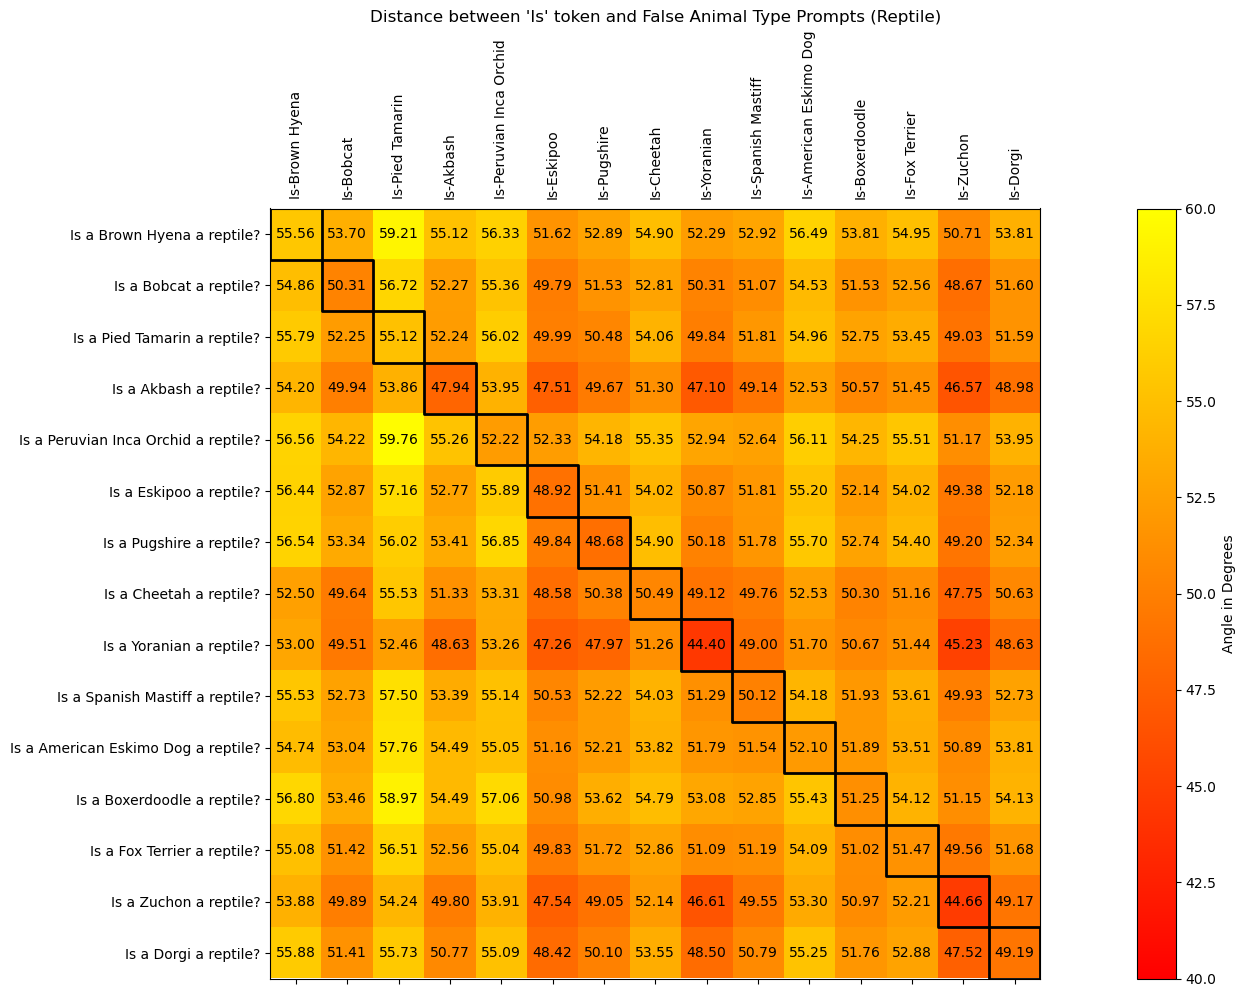

In [14]:
# Plotting Results in Heatmap
plt.figure(figsize=(25, 10)) 

vmin = 40  # Minimum value of the colorbar
vmax = 60

heatmap = plt.imshow(angleMatrix, cmap='autumn', vmin=vmin, vmax=vmax)

# Add cell values as text annotations
for i in range(len(vecEmbedsIs)):
    for j in range(len(vecEmbedsMammals2_reshaped)):
        plt.annotate(f'{angleMatrix[i][j]:.2f}', xy=(j, i), ha='center', va='center')

for i in range(len(angleMatrix)):
    # Draw a box around the cell (i, i) in the main diagonal
    plt.plot([i - 0.5, i - 0.5, i + 0.5, i + 0.5, i - 0.5], [i - 0.5, i + 0.5, i + 0.5, i - 0.5, i - 0.5],
             color='black', linestyle='-', linewidth=2)

xlabels = ["Is-Brown Hyena", "Is-Bobcat", "Is-Pied Tamarin", "Is-Akbash", 
           "Is-Peruvian Inca Orchid", "Is-Eskipoo", "Is-Pugshire", "Is-Cheetah",
          "Is-Yoranian", "Is-Spanish Mastiff", "Is-American Eskimo Dog", "Is-Boxerdoodle",
          "Is-Fox Terrier", "Is-Zuchon", "Is-Dorgi"]

plt.title("Distance between 'Is' token and False Animal Type Prompts (Reptile)") 
plt.xticks(np.arange(len(xlabels)), xlabels, rotation=90) #Is or mammal
plt.yticks(np.arange(len(list_of_strings)), list_of_strings) # animal words
plt.tick_params(axis='x', labeltop=True, labelbottom=False)
cbar = plt.colorbar(heatmap)
cbar.set_label("Angle in Degrees")

# Show the plot
plt.show()